# Neurônio Sigmóide


In [2]:
%matplotlib inline
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import random

/home/usuarios/pessoas/julianofoleiss/.local/lib/python2.7/site-packages/scipy/sparse/lil.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/home/usuarios/pessoas/julianofoleiss/.local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:165: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._shortest_path import shortest_path, floyd_warshall, dijkstra,\
/home/usuarios/pessoas/julianofoleiss/.local/lib/python2.7/site-packages/scipy/sparse/csgraph/_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._tools import csgraph_to_dense, csgraph_from_dense,\
/home/usuarios/pessoas/julianofoleiss/.local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:167: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._t

## Funções auxiliares

Estas funções servem para ajudar a analisar o funcionamento do perceptron. Em especial, a função acc_perceptron abaixo retorna a acurácia do perceptron em um conjunto de dados X e rótulos Y. A acurácia é dada por:

$$acc = \frac{\text{acertos}}{\text{acertos}+\text{erros}}$$

Desta forma a acurácia é um número que vai de $0$ a $1$ e indica a proporção de acertos em relação ao número total de exemplos.

In [3]:
#Plota as características feature_idxs (lista com 2 indíces de características)
#X é um vetor onde todos os elementos antes do sep_idxs são da classe 1 e 
#todos de sep_idxs + 1 até o fim são da classe 2.
def plot_features(X, sep_idx, feature_idxs):
    c1 = 'red'
    c2 = 'green'
    
    f1_a = []
    f2_a = []
    f1_b = []
    f2_b = []
    
    for i in X[:sep_idx]:
        f1_a.append(i[feature_idxs[0]])
        f2_a.append(i[feature_idxs[1]])
    
    for i in X[sep_idx + 1:]:
        f1_b.append(i[feature_idxs[0]])
        f2_b.append(i[feature_idxs[1]])   
        
    plt.scatter(f1_a, f2_a, c=c1)
    plt.scatter(f1_b, f2_b, c=c2)

#Retorna a acurácia do perceptron. X e Y são vetores paralelos e w é o vetor de pesos.
def acc_perceptron(X, Y, w):
    hits = float(0)
    misses = float(0)
    for n in xrange(len(X)):
        x_n = X[n]
        d_n = d(Y, n)
        y_n = decision(eval_sigmoid_neuron(x_n, w))
        if (d_n - y_n) == 0:
            hits+=1
        else:
            misses+=1
            
    return hits/(hits+misses)
    

## Descrição do Neurônio Sigmóide

O neurônio sigmóide difere do perceptron nos seguintes aspectos:

1. A saída pode assumir valores entre 0 e 1.

2. Usa a função de ativação sigmóide (também conhecida como função logística):

    $$\sigma(v) = \frac{1}{1 + e^{-v}} = \frac{1}{1 + \exp \left ( - \sum_j w_j x_j \right )} $$

    ![Gráfico da função sigmoide e de sua primeira derivada](sigmoid.png)
    
    Note sua semelhança com a função *threshold* (limiar), exceto que deslocada "para cima" e com uma suavização entre -4 e 4, aproximadamente. Essa suavização nos permite calcular a derivada da função, que é útil para o processo de otimização com a descida do gradiente. Assim podemos calcular as mudanças na saída a partir de pequenas variações dos pesos sinápticos do neurônio.

    Desta forma, a saída do neurônio sigmóide é dado por:
    
    $$\hat y = \sigma(x\cdot w)$$
    
3. O mapeamento da saída do neurônio sigmóide em classes (em problemas de classificação) é feita de forma arbitrária. Por exemplo, a decisão final pode ser dada por uma função por partes:

$$ \text{decision}(v) =
  \begin{cases}
    -1       & \quad \text{if } v \leq 0.5\\
    1  & \quad \text{if } v \gt 0.5
  \end{cases}
$$

### Treinamento com a descida do gradiente

Podemos definir uma função de erro (também chamada de Função de Custo) para quantificar os erros de predição para um conjunto de N exemplos:

$$C = \frac{1}{2N} \sum_{i=1}^{N} (\hat y_i - y_i)^2$$

tal que $\hat y_i = \sigma(x(i)\cdot w(k))$ é a predição correspondente à saída do neurônio sigmóide para o exemplo $i$, na época $k$ e y_i é a saída desejada (gabarito) do exemplo $i$.

O que queremos é o vetor de pesos w* que minimiza a função de custo C:

$$\arg \min_{w*} C$$

Um dos métodos usados para minimizar esta função de custo é a descida do gradiente. Lembrando que o passo da descida do gradiente é dado:

$$w(n+1) = w(n) - \epsilon \nabla_w f(w)$$ 

tal que $\nabla_w f(w)$ é o vetor gradiente da função f(w), a qual se deseja minimizar.

Desta forma, para minimizar C, é necessário calcular seu gradiente, $\nabla_wC$. Note que $C$ é uma função que depende indiretamente de $w$, uma vez que $\hat y$ é uma função de $w$. Desta forma, podemos usar a regra da cadeia para computar $\nabla_wC$. Sem perda de generalizade, usando a regra da cadeia, o cálculo da derivada parcial de C em função de $w_0$ é dada por:

$$\frac{\partial C}{\partial w_0} = \frac{\partial C}{\partial \hat y} \frac{\partial \hat y}{\partial w_0}$$.

Aplicando a regra do "tomba":

$$\frac{\partial C}{\partial \hat y} = \frac{1}{N} \sum_{i=1}^{N} (\hat y_i - y_i)$$

Aplicando a regra do quociente:

$$\frac{\partial \hat y}{\partial w_0} = \frac{\partial \sigma(\hat y)}{\partial w_0} = \frac{\partial \frac{1}{1 + \exp(-(x \cdot w))}}{\partial w_0} = \frac{e^{- \hat y}}{(1+e^{- \hat y})^2} x_0 $$

Desta forma, 

$$\frac{\partial C}{\partial w_0} = \frac{\partial C}{\partial \hat y} \frac{e^{- \hat y}}{(1+e^{- \hat y})^2} x_0 $$.

Seja 

$$\sigma'(\hat y) = \frac{e^{- \hat y}}{(1+e^{- \hat y})^2} $$

Desta forma, $\nabla_w C$ é dado por:

$$\nabla_w C = \left \{ \frac{\partial C}{\partial \hat y} \sigma'(\hat y) x_0, \frac{\partial C}{\partial \hat y} \sigma'(\hat y) x_1, \dots, \frac{\partial C}{\partial \hat y} \sigma'(\hat y) x_m \right \}$$.

In [4]:
#Função de decisão: arbitrariamente: x > 0.5 é classe positiva e x <= 0.5 é classe negativa.
def decision(x):
    return 1 if x > 0.5 else 0

#Função d que indica a saída desejada. Note a classe 0 está mapeada para 1, enquanto 
#as outras estão mapeadas para -1
def d(targets, idx):
    #return 1 if targets[idx] == 0 else -1
    return targets[idx]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_dx(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

#Avaliação do neurônio sigmóide
def eval_sigmoid_neuron(x, w):
    return sigmoid(np.dot(x,w))

## Bancada de Testes do Neurônio Sigmóide (Treino online)


vetor de pesos apos o treino: [-0.00964277  0.42963234 -0.36493307]
Acurácia: 0.50


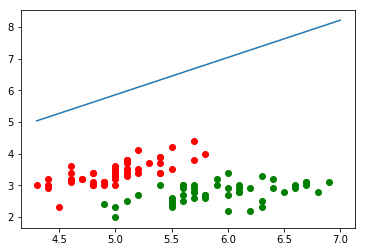

In [8]:
#Treinamento do neurônio sigmóide
def fit_neuron(X, Y, eta, shuffle=True,w_inicial=None):
    if shuffle:
        s= np.arange(len(X))
        np.random.shuffle(s)
        X = X[s]
        Y = Y[s]
    
    #inicializar vetor de pesos com todos os valores em 0 caso um w_inicial não seja passado.
    w = w_inicial if w_inicial is not None else np.zeros(X.shape[1])
    
    for k in xrange(1):
        for n in xrange(len(X)):
            x_n = X[n]
            y_n = eval_sigmoid_neuron(x_n, w)
            grad = (y_n - d(Y, n)) * (sigmoid_dx(np.dot(x_n,w)) * x_n)
            w = w - eta * grad        
    return w

dataset = load_iris()

X = dataset.data
Y = dataset.target

#adicionar a coluna de 1's (bias)
X = np.insert(X, 0, np.array([1] * len(X)), axis=1)

#usar os 100 primeiros exemplos e 2 primeiras características (e o bias na primeira coluna).
#Escolhi os 100 primeiros pq os 50 primeiros são da classe 0 e os próximos 50 são da classe 1.
X = X[:100,:3]
#recuperar também os rótulos dos 100 primeiros exemplos
Y = Y[:100]

#Treinar o perceptron
w = fit_neuron(X, Y, eta=0.1, shuffle=True)
print('vetor de pesos apos o treino: %s' % str(w))

#plotar as features!
plot_features(X, 50, [1,2])

#plotar a fronteira de decisão
xdb = np.linspace(np.min(X[:,1]),np.max(X[:,1]),20)
ydb = map(lambda x: (-w[1]/w[2])*x + (-w[0]/w[2]), xdb)
plt.plot(xdb, ydb)

print('Acurácia: %.2f' % acc_perceptron(X, Y, w))


[-0.15229291  0.97410502 -1.66616707]
Acurácia: 0.99


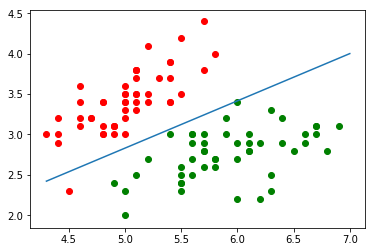

In [12]:
w = fit_neuron(X, Y, eta=0.1, shuffle=True, w_inicial=w)
print w
#plotar as features!
plot_features(X, 50, [1,2])

#plotar a fronteira de decisão
xdb = np.linspace(np.min(X[:,1]),np.max(X[:,1]),20)
ydb = map(lambda x: (-w[1]/w[2])*x + (-w[0]/w[2]), xdb)
plt.plot(xdb, ydb)

print('Acurácia: %.2f' % acc_perceptron(X, Y, w))

## Visualização do treino passo-a-passo (Treino online)

Esta parte faz o treinamento e grava todos os passos (valor do vetor de pesos) do algoritmo.

In [60]:
#Treinamento do neurônio sigmóide
def fit_neuron_steps(X, Y, eta, epochs=1, shuffle=True,w_inicial=None):
    steps = []
    
    w = w_inicial if w_inicial is not None else np.zeros(X.shape[1])
    
    for e in range(epochs):
    
        if shuffle:
            s= np.arange(len(X))
            np.random.shuffle(s)
            X = X[s]
            Y = Y[s]

        #inicializar vetor de pesos com todos os valores em 0 caso um w_inicial não seja passado.
        for k in xrange(1):
            for n in xrange(len(X)):
                x_n = X[n]
                y_n = eval_sigmoid_neuron(x_n, w)
                grad = (y_n - d(Y, n)) * (sigmoid_dx(np.dot(x_n,w)) * x_n)
                w = w - eta * grad  
                steps.append(w)
                
    return steps

steps =  fit_neuron_steps(X,Y,0.4, epochs=10, shuffle=True, w_inicial=None)

print len(steps)

si = 0

1000


Execute a caixa abaixo sucessivamente para ver a trajetória do vetor de pesos conforme as variações.

Passo 320:  [-0.32303339  1.78415414 -3.03226501]
Acurácia: 0.99


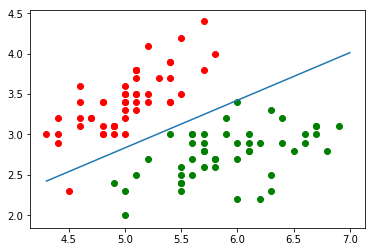

In [77]:
w = steps[si]
print 'Passo %d: ' % si, w
#plotar as features!
plot_features(X, 50, [1,2])

#plotar a fronteira de decisão
xdb = np.linspace(np.min(X[:,1]),np.max(X[:,1]),20)
ydb = map(lambda x: (-w[1]/w[2])*x + (-w[0]/w[2]), xdb)
plt.plot(xdb, ydb)

print('Acurácia: %.2f' % acc_perceptron(X, Y, w))

si = (si + 20) % len(steps)

## Bancada de Testes do Neurônio Sigmóide (Treino em lote)

vetor de pesos apos o treino: [-0.68368133  2.6129197  -4.33737359]
Acurácia: 0.99


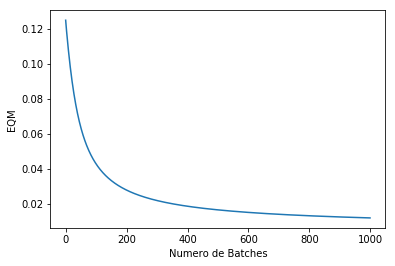

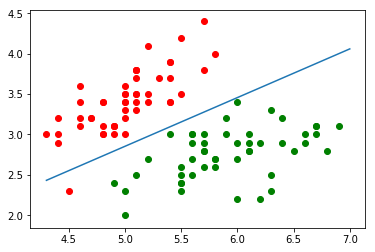

In [88]:
#Treinamento do neurônio sigmóide
def fit_neuron_batch(X, Y, eta, epochs=5, shuffle=True,w_inicial=None):
    
    batch_size=99
    
    if shuffle:
        s= np.arange(len(X))
        np.random.shuffle(s)
        X = X[s]
        Y = Y[s]
    
    #inicializar vetor de pesos com todos os valores em 0 caso um w_inicial não seja passado.
    w = w_inicial if w_inicial is not None else np.zeros(X.shape[1])
    eqms = []
    
    for k in xrange(epochs):
        for b in xrange(0, len(X)-batch_size, batch_size):
            grad = 0
            eqm = 0
            for n in range(b, b + batch_size):
                x_n = X[n]
                y_n = eval_sigmoid_neuron(x_n, w)
                eqm+= (y_n - d(Y, n))**2 
                grad += (y_n - d(Y, n)) * (sigmoid_dx(np.dot(x_n,w)) * x_n)
            
            grad = grad / batch_size
            w = w - eta * grad
            eqms.append(eqm / (2 * batch_size))
    
    plt.figure()
    plt.plot(eqms)
    plt.xlabel('Numero de Batches')
    plt.ylabel('EQM')
        
    return w

dataset = load_iris()

X = dataset.data
Y = dataset.target

#adicionar a coluna de 1's (bias)
X = np.insert(X, 0, np.array([1] * len(X)), axis=1)

#usar os 100 primeiros exemplos e 2 primeiras características (e o bias na primeira coluna).
#Escolhi os 100 primeiros pq os 50 primeiros são da classe 0 e os próximos 50 são da classe 1.
X = X[:100,:3]
#recuperar também os rótulos dos 100 primeiros exemplos
Y = Y[:100]

#Treinar o perceptron
w = fit_neuron_batch(X, Y, eta=0.5, epochs=1000, shuffle=True)
print('vetor de pesos apos o treino: %s' % str(w))

#plotar as features!
plt.figure()
plot_features(X, 50, [1,2])

#plotar a fronteira de decisão
xdb = np.linspace(np.min(X[:,1]),np.max(X[:,1]),20)
ydb = map(lambda x: (-w[1]/w[2])*x + (-w[0]/w[2]), xdb)
plt.plot(xdb, ydb)

print('Acurácia: %.2f' % acc_perceptron(X, Y, w))
